In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:42:47 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'XRP'

In [5]:
def datetime_xrp_supply_curve():
    supply = [
        # Total distribution,
    ]
    start_date = datetime.datetime(2018, 12, 1)
    escrow_cue = [1e9] * 52
    y = 40 * 1e9
    supply.append([y])
    for _ in range(400):
        xrp = escrow_cue.pop(0)
        y += (xrp / 2)
        escrow_cue.append(xrp / 2)
        supply.append([y])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='MS',
        periods=len(df)
    )
    return df

,total_supply,total_supply_pct,date
0,4.000000e+10,43.604156,2018-12-01
1,4.050000e+10,44.149208,2019-01-01
2,4.100000e+10,44.694260,2019-02-01
3,4.150000e+10,45.239312,2019-03-01
4,4.200000e+10,45.784364,2019-04-01


,total_supply,total_supply_pct,date
396,9.171875e+10,99.982967,2051-12-01
397,9.172266e+10,99.987225,2052-01-01
398,9.172656e+10,99.991484,2052-02-01
399,9.173047e+10,99.995742,2052-03-01
400,9.173438e+10,100.000000,2052-04-01


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

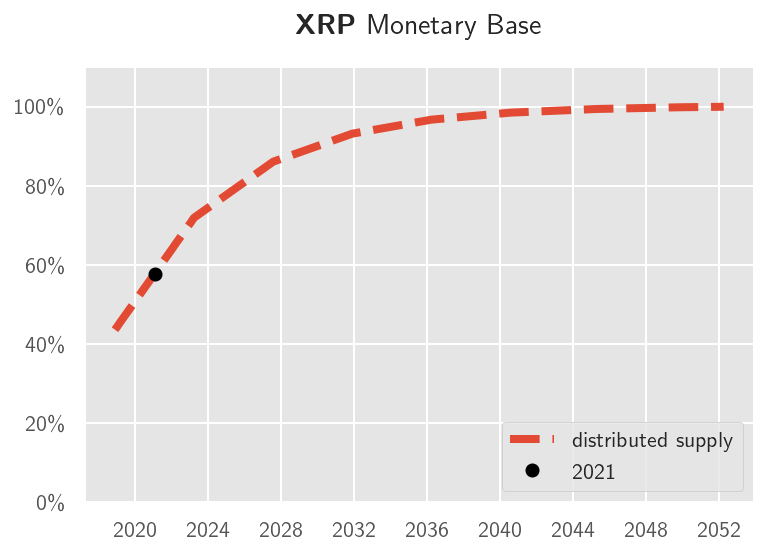

In [6]:
supply = datetime_xrp_supply_curve()

display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'XRP',
    fmt='--',
    ylim=(0, 110),
);

## Standardize Time Series

In [7]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 401 lines to file ../output-data/XRP_weekly.csv


,coin,total_supply,total_supply_pct,date
0,XRP,4.000000e+10,43.604156,2018-12-01
1,XRP,4.050000e+10,44.149208,2019-01-01
2,XRP,4.100000e+10,44.694260,2019-02-01
3,XRP,4.150000e+10,45.239312,2019-03-01
4,XRP,4.200000e+10,45.784364,2019-04-01


,coin,total_supply,total_supply_pct,date
396,XRP,9.171875e+10,99.982967,2051-12-01
397,XRP,9.172266e+10,99.987225,2052-01-01
398,XRP,9.172656e+10,99.991484,2052-02-01
399,XRP,9.173047e+10,99.995742,2052-03-01
400,XRP,9.173438e+10,100.000000,2052-04-01


In [8]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 401 lines to file ../output-data/XRP_monthly.csv


,coin,total_supply,total_supply_pct,date
0,XRP,4.000000e+10,43.604156,2018-12-01
1,XRP,4.050000e+10,44.149208,2019-01-01
2,XRP,4.100000e+10,44.694260,2019-02-01
3,XRP,4.150000e+10,45.239312,2019-03-01
4,XRP,4.200000e+10,45.784364,2019-04-01


,coin,total_supply,total_supply_pct,date
396,XRP,9.171875e+10,99.982967,2051-12-01
397,XRP,9.172266e+10,99.987225,2052-01-01
398,XRP,9.172656e+10,99.991484,2052-02-01
399,XRP,9.173047e+10,99.995742,2052-03-01
400,XRP,9.173438e+10,100.000000,2052-04-01


In [9]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 35 lines to file ../output-data/XRP_yearly.csv


,coin,total_supply,total_supply_pct,date
0,XRP,4.000000e+10,43.604156,2018-12-01
1,XRP,4.050000e+10,44.149208,2019-01-01
2,XRP,4.650000e+10,50.689831,2020-01-01
3,XRP,5.250000e+10,57.230455,2021-01-01
4,XRP,5.850000e+10,63.771078,2022-01-01


,coin,total_supply,total_supply_pct,date
30,XRP,9.147656e+10,99.718958,2048-01-01
31,XRP,9.157031e+10,99.821155,2049-01-01
32,XRP,9.162891e+10,99.885028,2050-01-01
33,XRP,9.167578e+10,99.936127,2051-01-01
34,XRP,9.172266e+10,99.987225,2052-01-01
